<a href="https://colab.research.google.com/github/NemesisCrociata/Prediction-of-Adult-Income/blob/main/Prediction_of_Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Adult Income
Nemesis Crociata
## Project Overview
- A model is developed to predict adult income based on standard features taken by the U.S. Census from 1994.

## Load and Inspect Data

In [1]:
# Relevant packages are imported.

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

pd.set_option('display.max_columns',100)

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn import set_config
set_config(transform_output='pandas')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay, classification_report,
                             RocCurveDisplay)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import load_iris

from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [2]:
# The dataset is imported.

file = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/adult.csv'

df = pd.read_csv(file)

In [3]:
# First 5 rows

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Last 5 rows

df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Data Dictionary

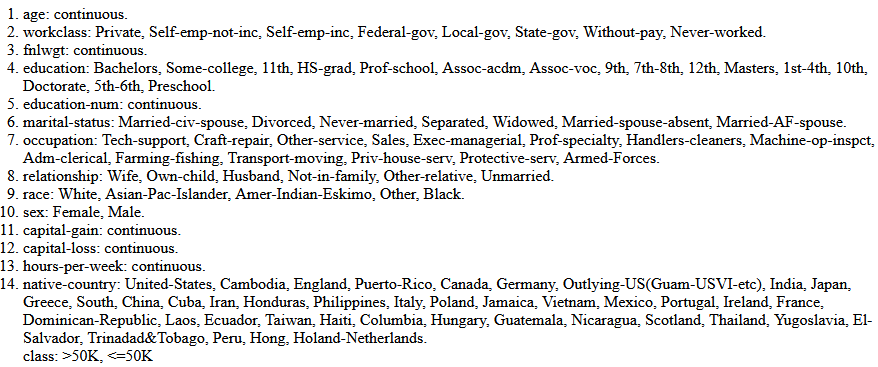

## Setting the style

In [6]:
# 'notebook' is used for the Google Colaboratory format.

sns.set_context('notebook', font_scale=1.5)

# The attribute .style is used with the method .use()

plt.style.use(['fivethirtyeight'])

# scatter_kws stores a dictionary which sets 'edgecolor' to white.
scatter_kws = dict(edgecolor='white')

## Clean Data

In [7]:
# Feature 'fnlwgt' is renamed for clarity.

df = df.rename({'fnlwgt': 'finalweight'}, axis=1)

df.head()

,age,workclass,finalweight,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Checking for duplicated rows

In [8]:
dups = df.duplicated().sum()

print(f'There are {dups} duplicate rows in the dataset.')

There are 52 duplicate rows in the dataset.


In [9]:
# Displaying the duplicate rows

df[df.duplicated(keep=False)]

,age,workclass,finalweight,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
488,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1319,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
1668,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
1854,22,Private,137876,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,20,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46665,20,?,203353,Some-college,10,Never-married,?,Own-child,White,Female,0,0,40,United-States,<=50K
46979,22,?,334593,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,<=50K
47126,46,Private,133616,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48274,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K


In [10]:
# Dropping duplicates

df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

### Checking for duplicated rows

In [11]:
# Showing the percentage of unique values of each feature

unique_vals = df.nunique()
unique_vals / len(df) * 100

age                 0.151670
workclass           0.018446
finalweight        58.460750
education           0.032794
educational-num     0.032794
marital-status      0.014347
occupation          0.030744
relationship        0.012298
race                0.010248
gender              0.004099
capital-gain        0.252101
capital-loss        0.202910
hours-per-week      0.196762
native-country      0.086083
income              0.004099
dtype: float64

### Checking for column data types

In [12]:
# Showing feature data types

df.dtypes

age                 int64
workclass          object
finalweight         int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

### Checking for impossible values

In [13]:
df.describe()

,age,finalweight,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
# All rows with ages below 18 are shown

df[df['age'] < 18]

,age,workclass,finalweight,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
38,17,Private,269430,10th,6,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
75,17,?,165361,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
402,17,Private,40299,11th,7,Never-married,Sales,Own-child,White,Female,0,0,25,United-States,<=50K
675,17,Private,190941,10th,6,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
765,17,?,143331,11th,7,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48053,17,?,256173,10th,6,Never-married,?,Own-child,White,Female,0,0,15,United-States,<=50K
48145,17,Private,214787,12th,8,Never-married,Adm-clerical,Own-child,White,Female,0,0,25,United-States,<=50K
48240,17,Private,24090,HS-grad,9,Never-married,Exec-managerial,Own-child,White,Female,0,0,35,United-States,<=50K
48563,17,Private,311907,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,25,United-States,<=50K


Since we are only analyzing adult income, all rows with ages below 18 will be dropped.

In [15]:
# Because 'age' is an integer-type, all minors are set equal to 17.0

minors = df[df['age']==17.0]

In [16]:
# Minors are dropped

df.drop(minors.index, inplace=True)

In [17]:
# The new minimum is shown

df['age'].min()

18

### Checking for consistent values

In [18]:
# The value counts from each column are pulled using a for loop.
# Each loop will get the value counts of a single column.

for col in df.columns:
  print(f'Value Counts for {col}:')
  print(df[col].value_counts ())
  print('\n')

Value Counts for age:
36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 73, dtype: int64


Value Counts for workclass:
Private             33407
Self-emp-not-inc     3852
Local-gov            3115
?                    2698
State-gov            1979
Self-emp-inc         1686
Federal-gov          1430
Without-pay            21
Never-worked            8
Name: workclass, dtype: int64


Value Counts for finalweight:
203488    21
120277    19
190290    19
126569    18
125892    18
          ..
46857      1
89392      1
225904     1
269708     1
257302     1
Name: finalweight, Length: 28030, dtype: int64


Value Counts for education:
HS-grad         15756
Some-college    10858
Bachelors        8013
Masters          2656
Assoc-voc        2060
Assoc-acdm       1601
11th             1545
10th             1191
7th-8th           949
Prof-school       834
9th               720
Doctorate         594
12th       

In [19]:
# The '?' values are replaced with nulls

df['workclass'] = df['workclass'].replace('?', np.nan)

# Null values are displayed for confirmation

df['workclass'].isna().sum()

2698

In [20]:
# To reduce cardinality, some values are grouped together and replaced

ed_dict= {'1st-4th': '1st-12th',
          '5th-6th': '1st-12th',
          '7th-8th': '1st-12th',
          '9th': '1st-12th',
          '10th': '1st-12th',
          '11th': '1st-12th',
          '12th': '1st-12th'}

df['education'] = df['education'].replace(ed_dict)
df['education'].value_counts()

HS-grad         15756
Some-college    10858
Bachelors        8013
1st-12th         5743
Masters          2656
Assoc-voc        2060
Assoc-acdm       1601
Prof-school       834
Doctorate         594
Preschool          81
Name: education, dtype: int64

In [21]:
# The process is repeated for countries of origin

country_dict= {'?': np.nan,
               'South': np.nan,
               'United-States': 'Natural Born Citizen',
               'Outlying-US(Guam-USVI-etc)': 'North America',
               'Canada': 'North America',
               'Mexico': 'Central America',
               'El-Salvador': 'Central America',
               'Columbia': 'Central America',
               'Nicaragua': 'Central America',
               'Ecuador': 'Central America',
               'Peru': 'Central America',
               'Honduras': 'Central America',
               'Haiti': 'Caribbean',
               'Cuba': 'Caribbean',
               'Dominican-Republic': 'Caribbean',
               'Jamaica': 'Caribbean',
               'Trinadad&Tobago': 'Caribbean',
               'Puerto-Rico': 'Caribbean',
               'England': 'Europe',
               'Italy': 'Europe',
               'Poland': 'Europe',
               'Greece': 'Europe',
               'France': 'Europe',
               'Ireland': 'Europe',
               'Portugal': 'Europe',
               'Yugoslavia': 'Europe',
               'Scotland': 'Europe',
               'Germany': 'Europe',
               'Hungary': 'Europe',
               'Holand-Netherlands': 'Europe',
               'India': 'Asia',
               'China': 'Asia',
               'Philippines': 'Asia',
               'Japan': 'Asia',
               'Vietnam': 'Asia',
               'Guatemala': 'Asia',
               'Taiwan': 'Asia',
               'Iran': 'Asia',
               'Hong': 'Asia',
               'Thailand': 'Asia',
               'Cambodia': 'Asia',
               'Laos': 'Asia'}

df['native-country'] = df['native-country'].replace(country_dict)

# The column is renamed to suit the data

df.rename(columns={'native-country': 'native-region'}, inplace=True)

print(df['native-region'].value_counts())

print(df['native-region'].isna().sum())

Natural Born Citizen    43230
Central America          1329
Asia                     1062
Europe                    775
Caribbean                 629
North America             203
Name: native-region, dtype: int64
968


In [22]:
# The process is repeated for occupations

occup_dict= {'?': np.nan,
             'Protective-serv': 'Other-service',
             'Priv-house-serv': 'Other-service',
             'Armed Forces': 'Other-service'}

df['occupation'] = df['occupation'].replace(occup_dict)

print(df['occupation'].value_counts())

print(df['occupation'].isna().sum())

Prof-specialty       6149
Craft-repair         6084
Exec-managerial      6079
Other-service        5943
Adm-clerical         5567
Sales                5365
Machine-op-inspct    3014
Transport-moving     2349
Handlers-cleaners    2013
Farming-fishing      1468
Tech-support         1444
Armed-Forces           15
Name: occupation, dtype: int64
2706


Although the feature still has high cardinality (13 features), all value counts that surpassed the threshold (1,000 counts) have been combined. This feature can be revisited and reduced if the model does not perform well.

### Checking for null values

In [23]:
# Displaying null values for each feature

df.isna().sum()

age                   0
workclass          2698
finalweight           0
education             0
educational-num       0
marital-status        0
occupation         2706
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-region       968
income                0
dtype: int64

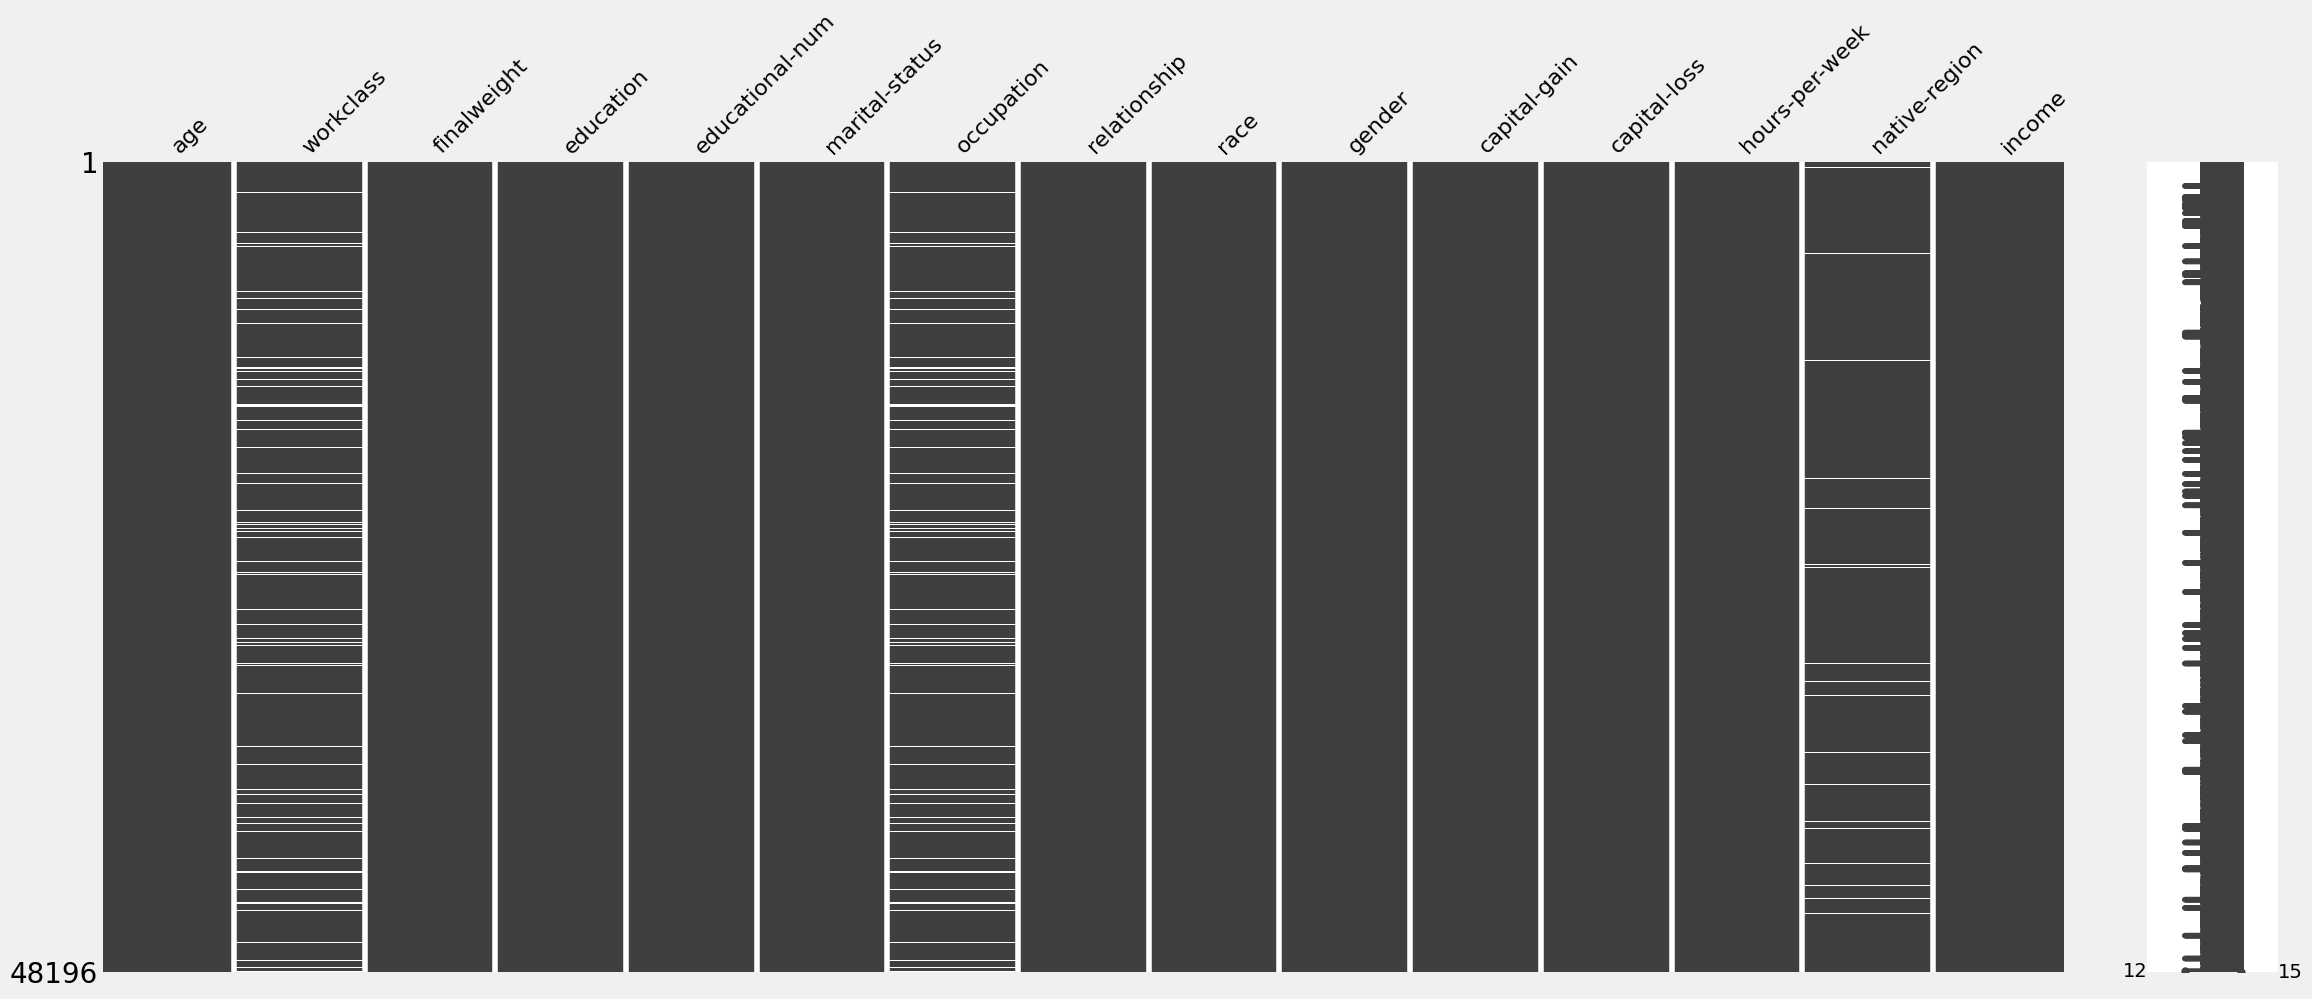

In [24]:
# Creating a visualization of null values

msno.matrix(df);

### Data summaries

In [25]:
# Summaries for each numeric feature

df.describe(include='number')

,age,finalweight,educational-num,capital-gain,capital-loss,hours-per-week
count,48196.000000,4.819600e+04,48196.000000,48196.000000,48196.000000,48196.000000
mean,38.919661,1.897980e+05,10.120653,1092.528011,88.264026,40.663582
std,13.579000,1.056636e+05,2.555671,7499.254448,404.819253,12.230551
min,18.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176025e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377290e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [26]:
# Summaries for each categorical feature

df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,gender,native-region,income
count,45498,48196,48196,45490,48196,48196,48196,47228,48196
unique,8,10,7,12,6,5,2,6,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,Natural Born Citizen,<=50K
freq,33407,15756,22364,6149,19702,41181,32314,43230,36515


## Exploratory Data Analysis

## Histograms for each numeric feature

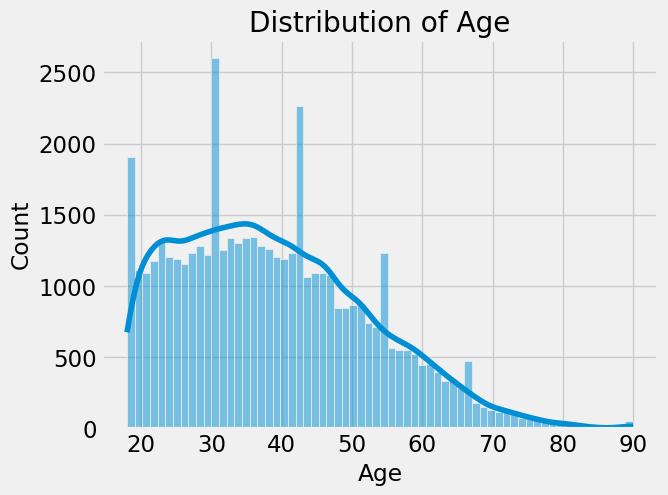

In [27]:
ax = sns.histplot(data=df, x='age', kde=True)

ax.set(xlabel='Age', ylabel='Count', title='Distribution of Age');

There is a bell curve for average age that peaks between 30 and 40 years of age.

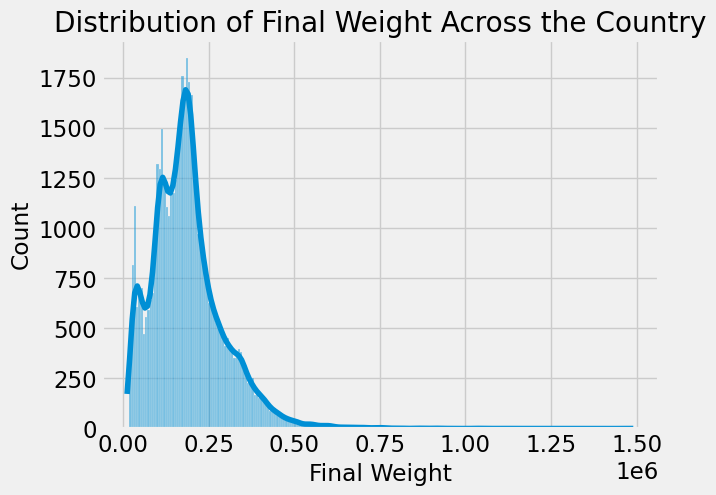

In [28]:
ax = sns.histplot(data=df, x='finalweight', kde=True)

ax.set(xlabel='Final Weight', ylabel='Count',
       title='Distribution of Final Weight Across the Country');

Final weight represents the number of units in the target population that the responding unit represents.

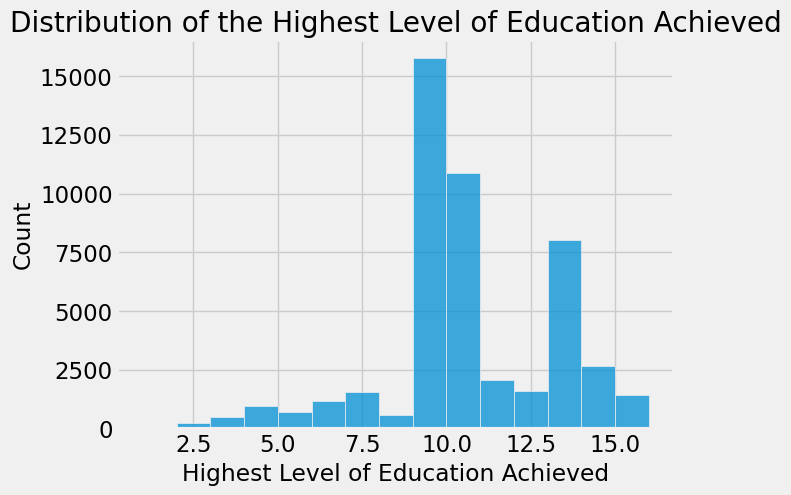

In [29]:
ax = sns.histplot(data=df, x='educational-num', binwidth=1)

ax.set(xlabel='Highest Level of Education Achieved', ylabel='Count',
       title='Distribution of the Highest Level of Education Achieved');

Adults most frequently achieved ~10 years of education.

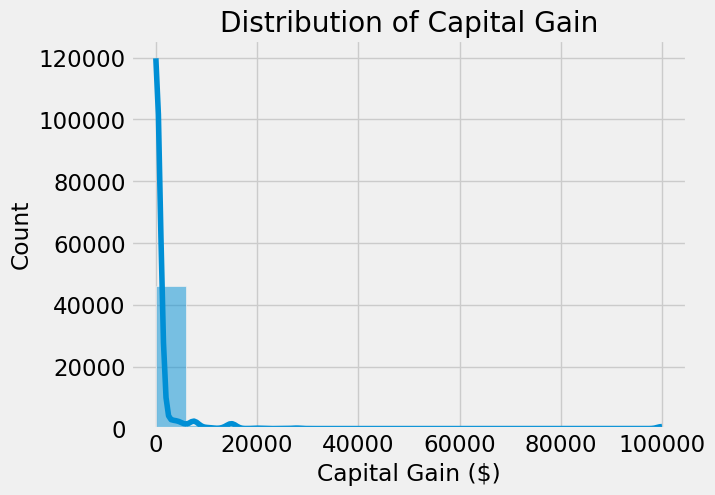

In [30]:
ax = sns.histplot(data=df, x='capital-gain', kde=True)

ax.set(xlabel='Capital Gain ($)', ylabel='Count',
       title='Distribution of Capital Gain');

Most adults saw little to no capital gain from the previous year.

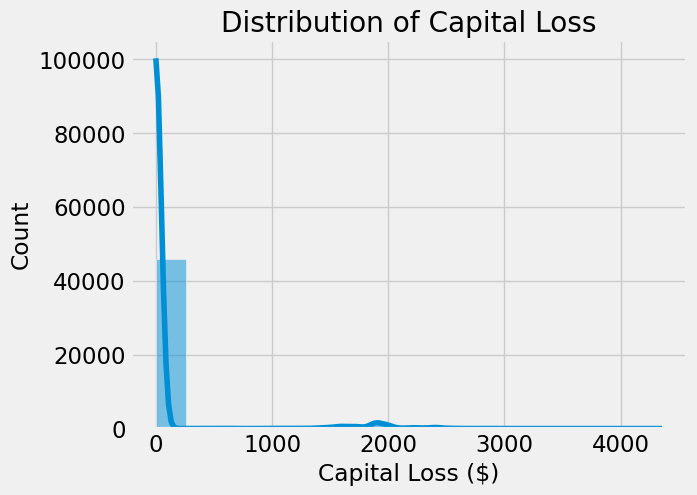

In [31]:
ax = sns.histplot(data=df, x='capital-loss', kde=True)

ax.set(xlabel='Capital Loss ($)', ylabel='Count',
       title='Distribution of Capital Loss');

Most adults saw little to no capital loss from the previous year.

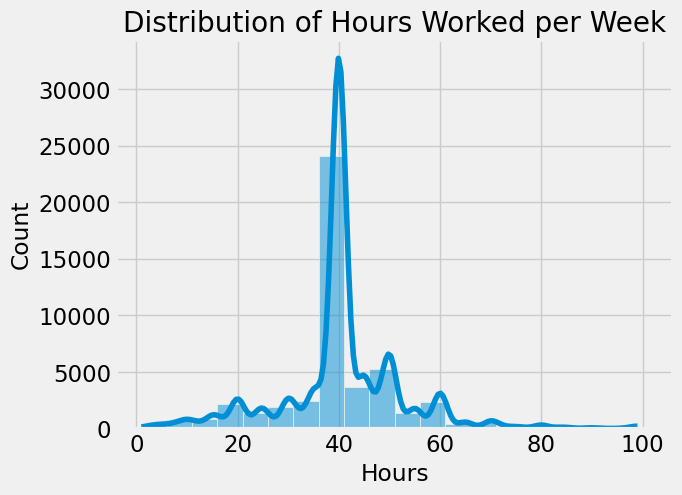

In [32]:
ax = sns.histplot(data=df, x='hours-per-week', binwidth=5, kde=True)

ax.set(xlabel='Hours', ylabel='Count',
       title='Distribution of Hours Worked per Week');

Most adults worked 40 or more hours per week.

## Countplots for each categorical feature

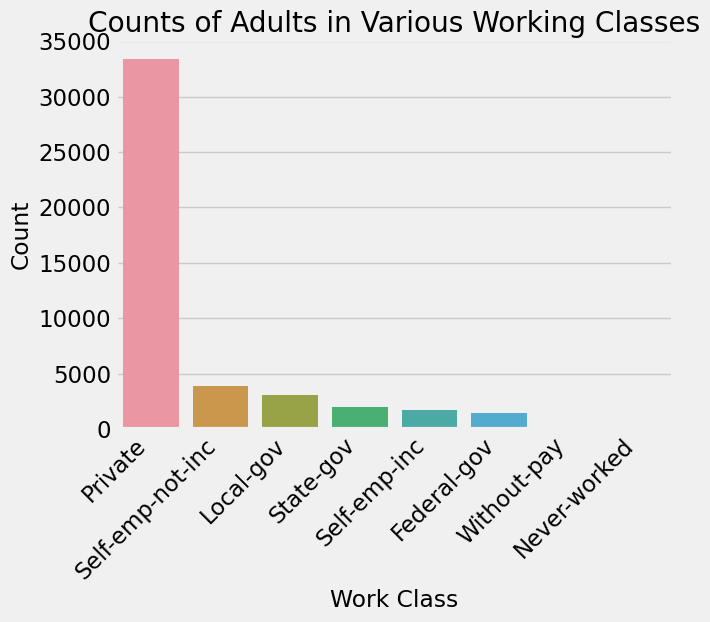

In [33]:
wc_counts = df['workclass'].value_counts()

ax = sns.countplot(data=df, x='workclass', order=wc_counts.index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.set(xlabel='Work Class', ylabel='Count',
       title='Counts of Adults in Various Working Classes');

The vast majority of adults were privately employed.

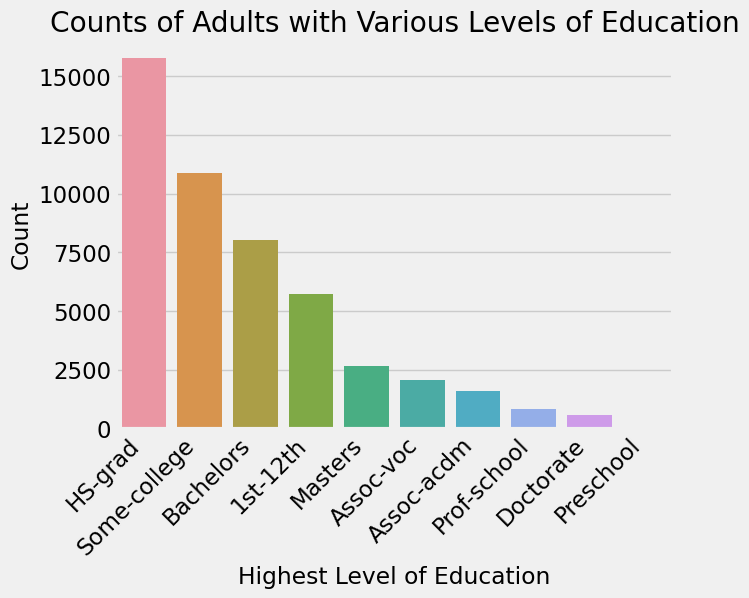

In [34]:
ed_counts = df['education'].value_counts()

ax = sns.countplot(data=df, x='education', order=ed_counts.index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.set(xlabel='Highest Level of Education', ylabel='Count',
       title='Counts of Adults with Various Levels of Education');

Most adults were high school graduates.

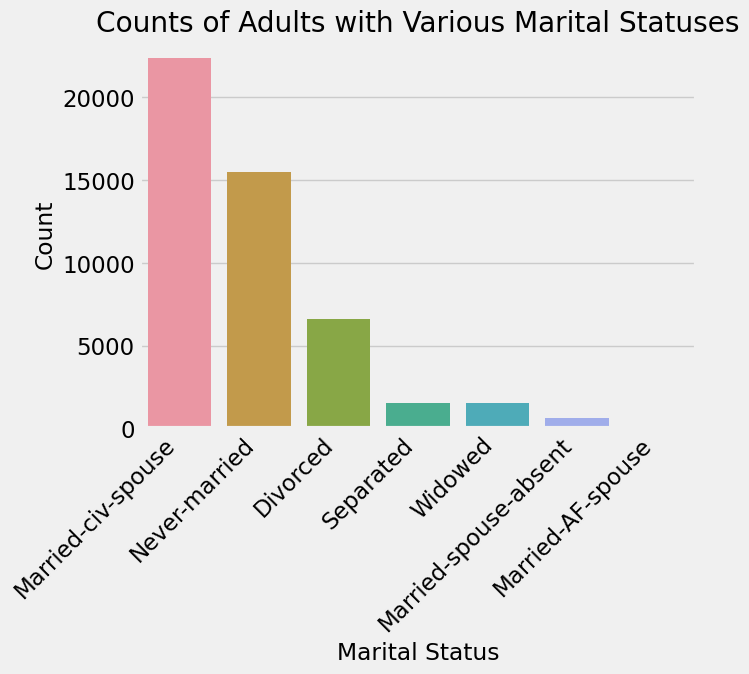

In [35]:
marital_counts = df['marital-status'].value_counts()

ax = sns.countplot(data=df, x='marital-status', order=marital_counts.index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.set(xlabel='Marital Status', ylabel='Count',
       title='Counts of Adults with Various Marital Statuses');

Most adults were married to a civilian spouse.

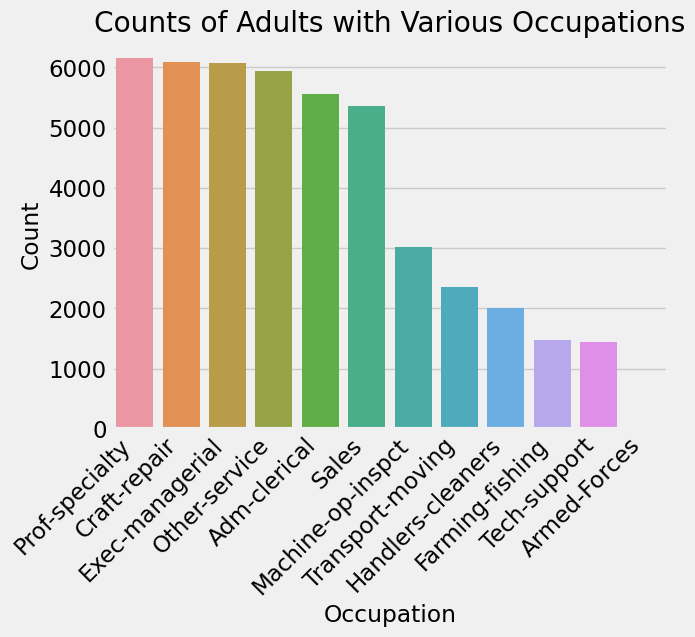

In [36]:
occup_counts = df['occupation'].value_counts()

ax = sns.countplot(data=df, x='occupation', order=occup_counts.index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.set(xlabel='Occupation', ylabel='Count',
       title='Counts of Adults with Various Occupations');

There was a relatively even distribution of adults in various occupations, excluding the Armed Forces.

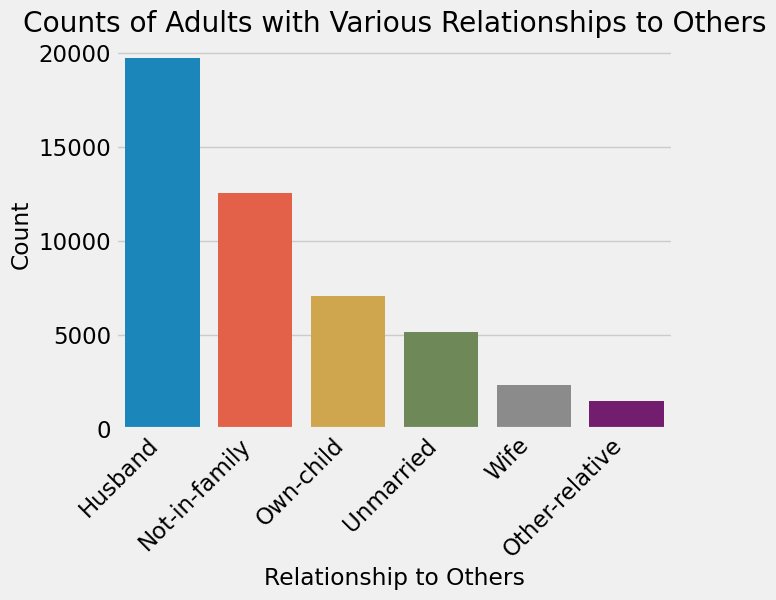

In [37]:
relationship_counts = df['relationship'].value_counts()

ax = sns.countplot(data=df, x='relationship', order=relationship_counts.index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.set(xlabel='Relationship to Others', ylabel='Count',
       title='Counts of Adults with Various Relationships to Others');

Most adults who completed the census were married men.

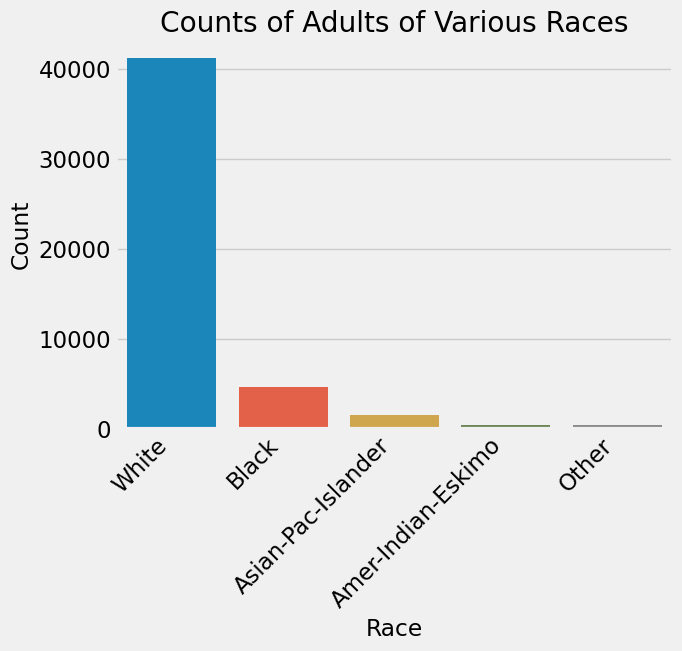

In [38]:
race_counts = df['race'].value_counts()

ax = sns.countplot(data=df, x='race', order=race_counts.index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.set(xlabel='Race', ylabel='Count',
       title='Counts of Adults of Various Races');

The vast majority of adults who completed the census were white.

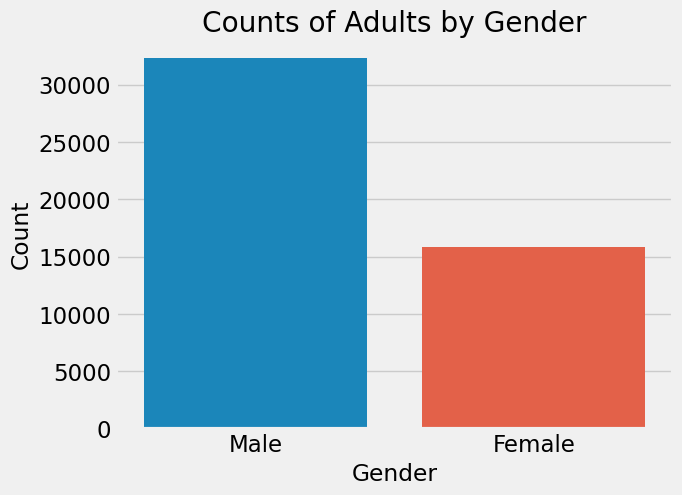

In [39]:
ax = sns.countplot(data=df, x='gender')

ax.set(xlabel='Gender', ylabel='Count', title='Counts of Adults by Gender');

The majority of adults were male.

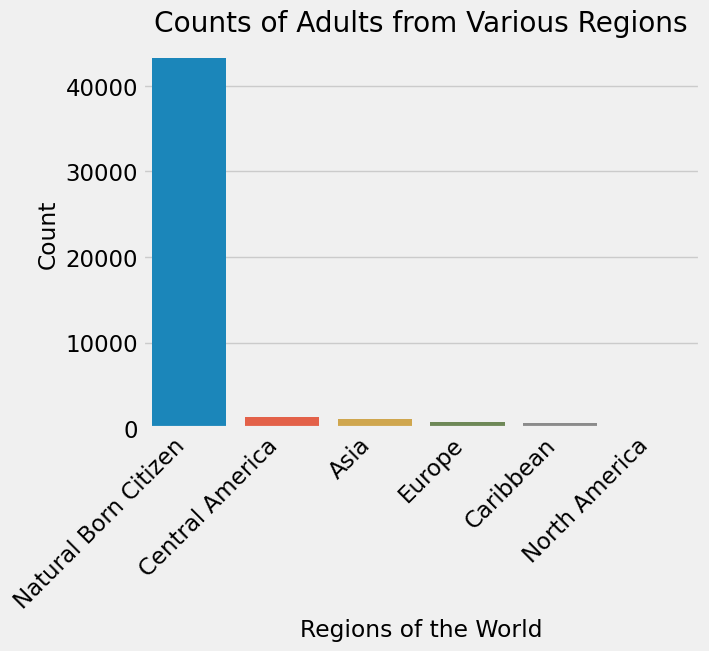

In [40]:
reg_counts = df['native-region'].value_counts()

ax = sns.countplot(data=df, x='native-region', order=reg_counts.index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.set(xlabel='Regions of the World', ylabel='Count',
       title='Counts of Adults from Various Regions');

The majority of adults were natural born citizens.

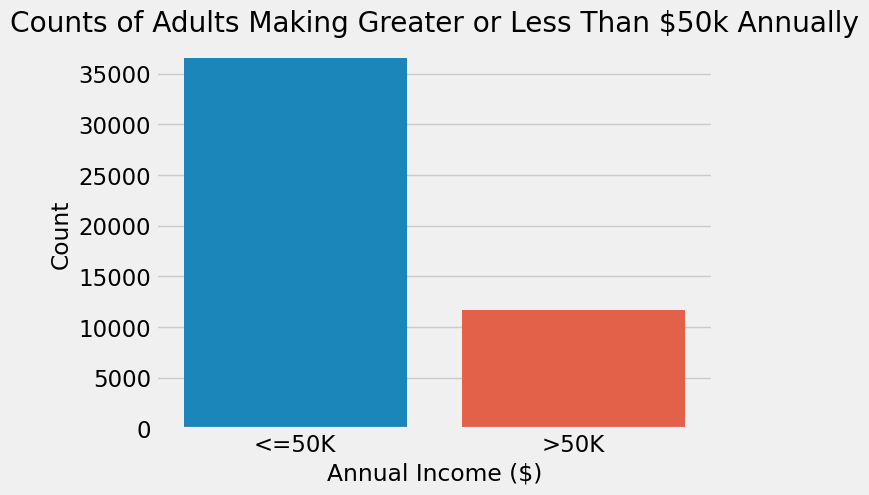

In [41]:
ax = sns.countplot(data=df, x='income')

ax.set(xlabel='Annual Income ($)', ylabel='Count',
       title='Counts of Adults Making Greater or Less Than $50k Annually');

The majority of adults made equal to or less than $50,000 annually.

### Correlation map for numeric features

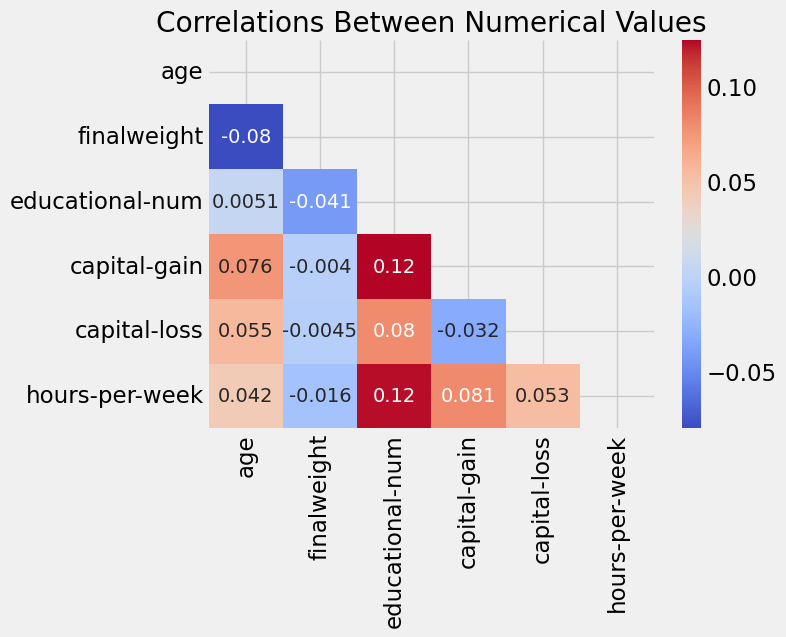

In [42]:
num_corr = df.corr(numeric_only = True)

pairplot_mask = np.triu(np.ones_like(num_corr))

fig, ax = plt.subplots()

sns.heatmap(num_corr, cmap= 'coolwarm', annot= True, mask=pairplot_mask)

ax.set_title('Correlations Between Numerical Values');

There is a slightly higher than average positive correlation between capital gain and years of education achieved, as well as hours worked per week and years of education achieved. It is still considered little to no correlation, however.

## Explanatory Data Analysis

In [43]:
# Credit to the Coding Dojo
# Displays both a histogram and boxplot with commentary

def viz_numeric(df, x, figsize=(6,5)):
  viz_df = df.copy()

  gridspec = {'height_ratios':[0.7, 0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)

  sns.histplot(data=df, x=x, ax=axes[0])
  sns.boxplot(data=df, x=x, ax=axes[1])
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  fig.tight_layout()
  plt.show()

  print('Type of feature: Numerical')

  null_count = df[x].isna().sum()
  null_percent = null_count / len(df) * 100
  print(f"- NaN's Found: {null_count} ({round(null_percent, 2)}%)")

  if null_count >0:
    print(f"Null values will be filled with the mean of the column.")

  return fig, axes

In [44]:
# Credit to the Coding Dojo
# Displays a barplot with commentary

def viz_categorical(df, x, fillna=True, placeholder='MISSING',
                    figsize=(6,4), order=None):
  viz_df = df.copy()

  null_count = viz_df[x].isna().sum()
  null_percent = null_count / len(viz_df) * 100
  if fillna == True:
    viz_df[x] = viz_df[x].fillna(placeholder)

  fig, ax = plt.subplots(figsize=figsize)
  sns.countplot(data=viz_df, x=x, ax=ax, order=order)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f"Column: {x}", fontweight='bold')

  fig.tight_layout()
  plt.show()

  print(f"- NaN's Found: {null_count} ({round(null_percent, 2)}%)")
  if null_count >0:
    print(f"Null values will be filled with the placeholder, 'MISSING'.\n")

  nunique = viz_df[x].nunique()
  if nunique >10:
    print(f"- High cardinality; {nunique} unique values.")
  else:
    print(f"- Low cardinality; {nunique} unique values.")

  value_counts = viz_df[x].value_counts(dropna=False)
  most_common_value = value_counts.index[0]
  frequency = value_counts.values[0]
  percent_most_common = frequency / len(viz_df) * 100

  print(f"- Most common value: '{most_common_value}' occurs {frequency} times ({round(percent_most_common, 2)}%)")
  if percent_most_common > 98:
        print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")

In [45]:
# Credit to the Coding Dojo
# Graphs a comparison of a numeric feature vs. the target

def viz_numeric_vs_target(df, x, y, figsize=(6,4),
                          target_type='reg', estimator='mean',
                          errorbar='ci', sorted=False, ascending=False,
                          **kwargs):

  nulls = df[[x,y]].isna().sum()

  if nulls.sum()>0:
    print(f"Excluding {nulls.sum()} NaN's")
    viz_df = df.dropna(subset=[x,y])
  else:
    viz_df = df

  fig, ax = plt.subplots(figsize=figsize)

  if target_type == 'reg':
    correlation = df[[x,y]].corr().round(2)
    r = correlation.loc[x,y]

    scatter_kws={'ec':'white','lw':1,'alpha':0.8}
    sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs)
    ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  elif target_type == 'class':
    if sorted == True:
      if estimator == 'median':
        group_vals = viz_df.groupby(y)[x].median()
      elif estimator == 'mean':
        group_vals = viz_df.groupby(y)[x].mean()

      group_vals = group_vals.sort_values(ascending=ascending)
      order = group_vals.index

    else:
      order = None

    sns.barplot(data=viz_df, x=y, y=x, order=order, estimator=estimator,
                  errorbar=errorbar, ax=ax, **kwargs)

    ax.set_title(f'{x} vs. {y}')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  fig.tight_layout()
  fig.show()
  return fig, ax

In [46]:
# Credit to the Coding Dojo
# Graphs a comparison of a categorical feature vs. the target

def viz_categorical_vs_target(df, x, y, figsize=(6,4), fillna = True,
                              placeholder = 'MISSING',
                              order = None, target_type='reg'):
  viz_df = df.copy()

  if fillna == True:
    viz_df[x] = viz_df[x].fillna(placeholder)
  else:
    viz_df = viz_df.dropna(subset=[x])

  fig, ax = plt.subplots(figsize=figsize)

  if target_type=='reg':
    sns.barplot(data=viz_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)

    sns.stripplot(data=viz_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3,zorder=0)
  elif target_type == 'class':
    ax = sns.histplot(data=viz_df, hue=y, x=x, stat='percent', multiple='fill')

  ax.set_xticks(ax.get_xticks())
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()


  return fig, ax

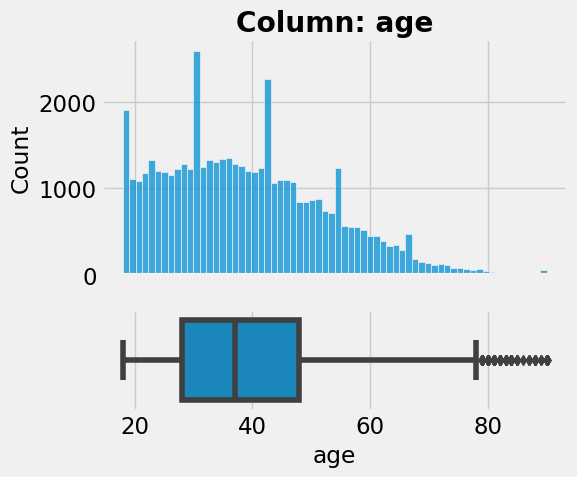

Type of feature: Numerical
- NaN's Found: 0 (0.0%)


In [47]:
viz_numeric(df, x='age');

Adults around age 77 and higher are considered outliers.

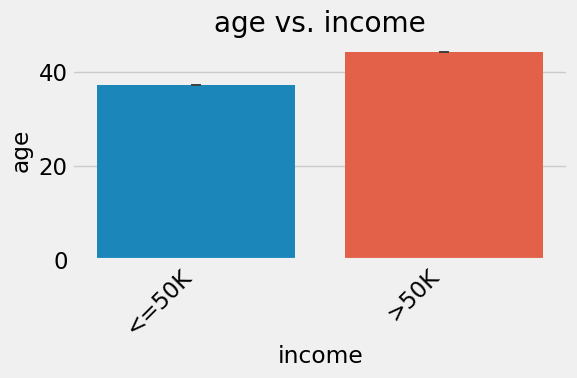

In [48]:
viz_numeric_vs_target(df, x='age', y='income', target_type='class');

- Adults who made equal to or less than \$50k annually were slightly younger than 40 on average.
- Adults who made more than $50k annually were slightly older than 40 on average.

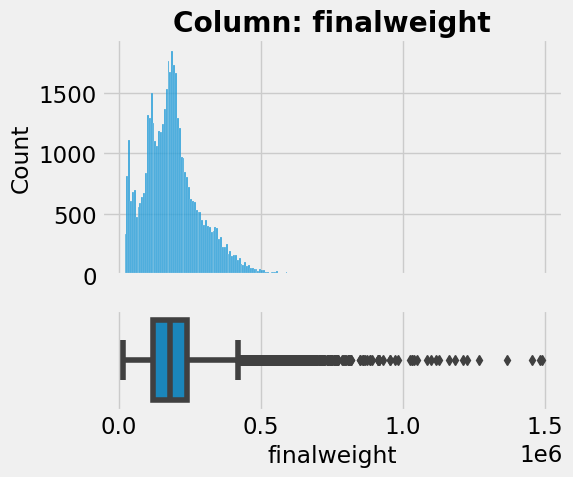

Type of feature: Numerical
- NaN's Found: 0 (0.0%)


In [49]:
viz_numeric(df, x='finalweight');

Each sample whose final weight was greater than 0.4 -- or 400,000 of the total US population -- is considered an outlier.

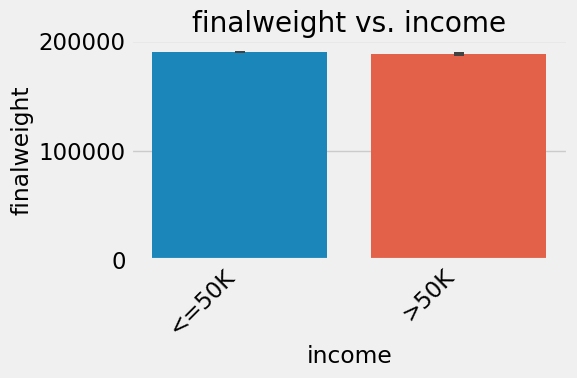

In [50]:
viz_numeric_vs_target(df, x='finalweight', y='income', target_type='class');

The final weight of a sample has no correlation to the target feature.

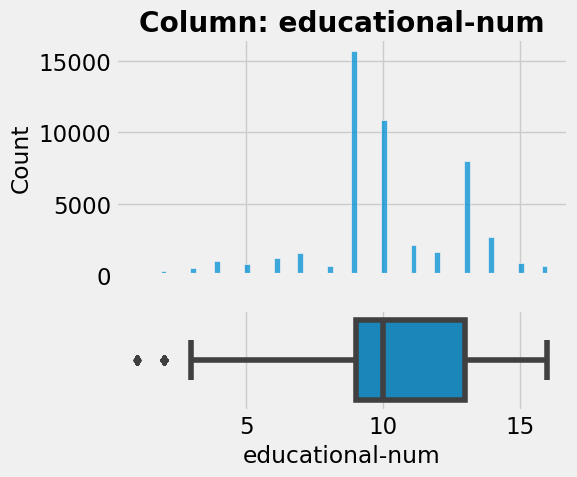

Type of feature: Numerical
- NaN's Found: 0 (0.0%)


In [51]:
viz_numeric(df, x='educational-num');

Adults who achieved less than 3 years of education are considered outliers.

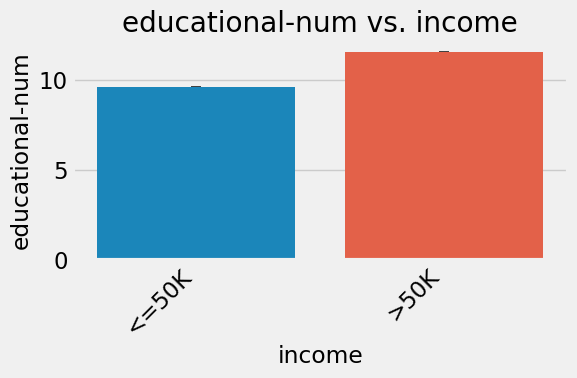

In [52]:
viz_numeric_vs_target(df, x='educational-num', y='income', target_type='class');

There is a slight increase in correlation between more years of education achieved and income greater than $50k annually.

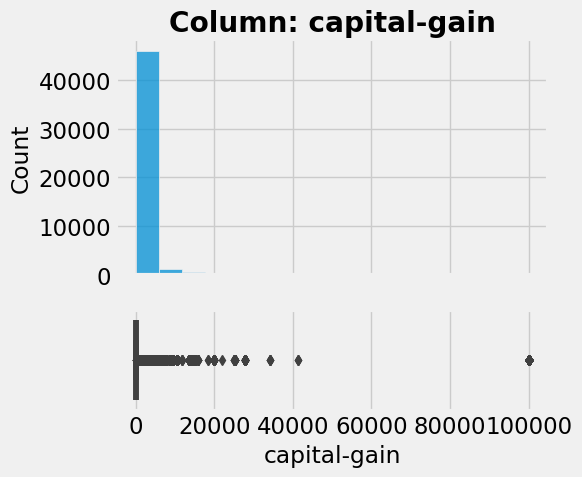

Type of feature: Numerical
- NaN's Found: 0 (0.0%)


In [53]:
viz_numeric(df, x='capital-gain');

Adults who reported more than little to no capital gain from the last year are considered outliers.

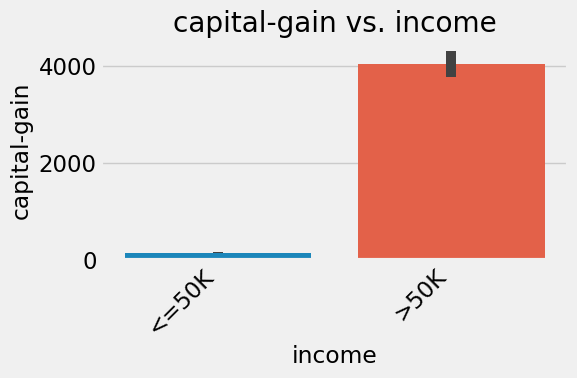

In [54]:
viz_numeric_vs_target(df, x='capital-gain', y='income', target_type='class');

There is a high correlation between adults who reported capital gain and adults who make more than $50k annually.

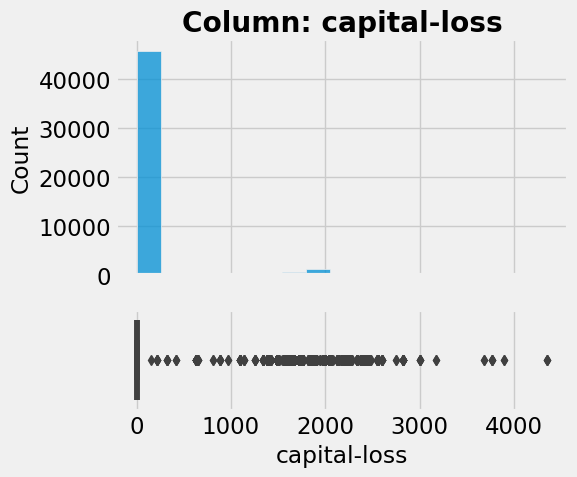

Type of feature: Numerical
- NaN's Found: 0 (0.0%)


In [55]:
viz_numeric(df, x='capital-loss');

Adults who reported more than little to no capital loss from the last year are considered outliers.

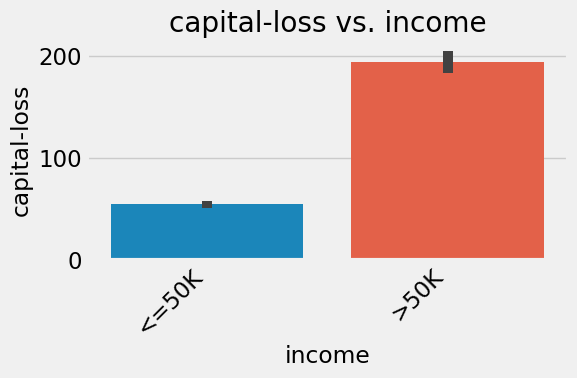

In [56]:
viz_numeric_vs_target(df, x='capital-loss', y='income', target_type='class');

- There is also a high correlation between adults who reported capital loss and adults who make more than \$50k annually.
- There is a slightly higher correlation between adults who reported capital loss and adults who made equal or less than $50k annually.

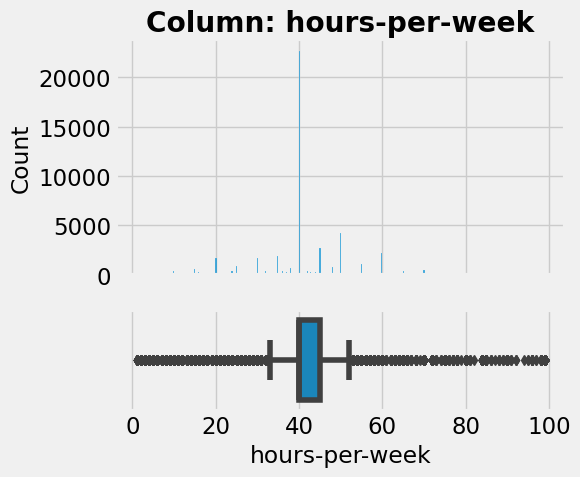

Type of feature: Numerical
- NaN's Found: 0 (0.0%)


In [57]:
viz_numeric(df, x='hours-per-week');

Adults who worked less than 35 hrs a week, or more than 50 hrs a week, are considered outliers. The average adult worked slightly more than 40 hours a week.

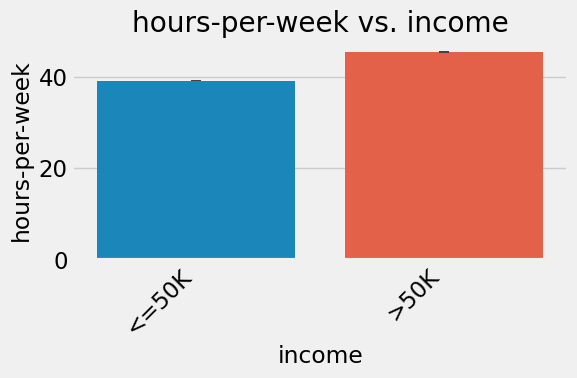

In [58]:
viz_numeric_vs_target(df, x='hours-per-week', y='income', target_type='class');

There is a slightly higher correlation between higher hours worked per week and higher income, than lower hours worked per week and lower income.

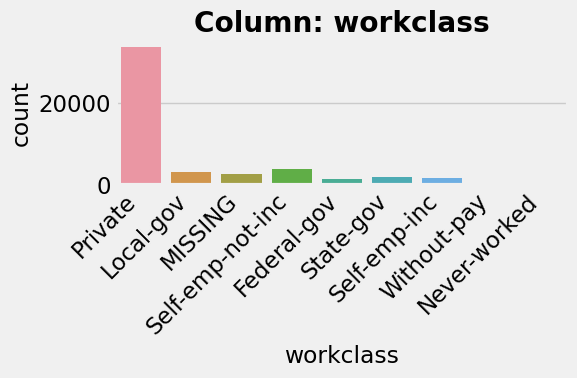

- NaN's Found: 2698 (5.6%)
Null values will be filled with the placeholder, 'MISSING'.

- Low cardinality; 9 unique values.
- Most common value: 'Private' occurs 33407 times (69.31%)
- Not constant or quasi-constant.


In [59]:
viz_categorical(df, x='workclass');

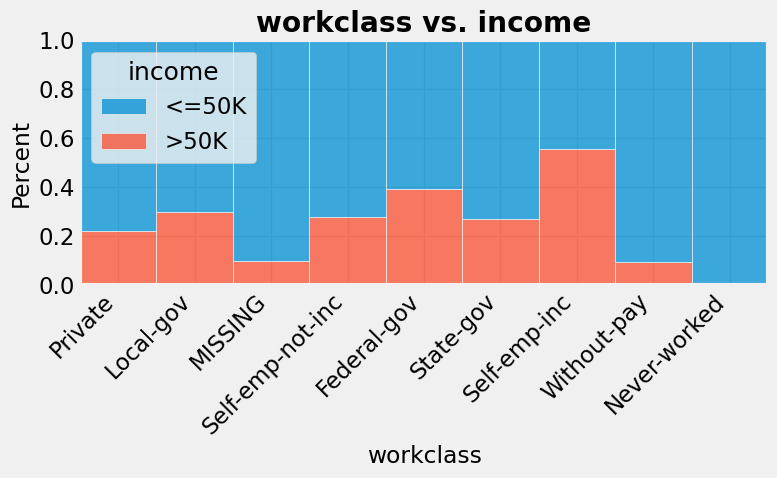

In [60]:
viz_categorical_vs_target(df, x='workclass', y='income', target_type='class',
                          figsize=(8,5));

- There is a higher correlation between incorporated self-employed adults and higher income.
- There is a direct correlation between adults who have never worked and lower income.
- Other than incorporated self-employed adults, the majority of occupations earn less income.

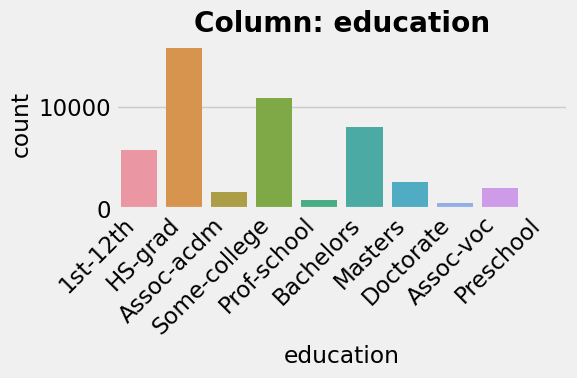

- NaN's Found: 0 (0.0%)
- Low cardinality; 10 unique values.
- Most common value: 'HS-grad' occurs 15756 times (32.69%)
- Not constant or quasi-constant.


In [61]:
viz_categorical(df, x='education');

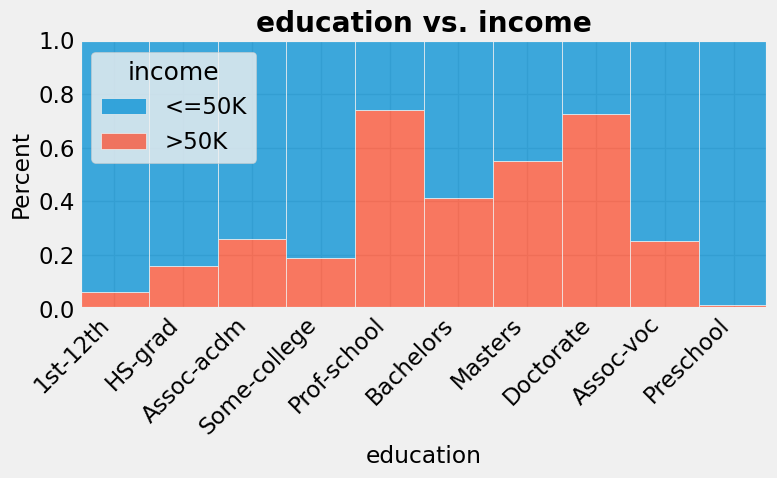

In [62]:
viz_categorical_vs_target(df, x='education', y='income', target_type='class',
                          figsize=(8,5));

- The majority of adults who completed professional schooling or earned their master's or doctorate's degree earn higher income.
- There is almost a direct correlation between adults who have only completed preschool and lower income.
- All other education levels, by majority, earn lower income.

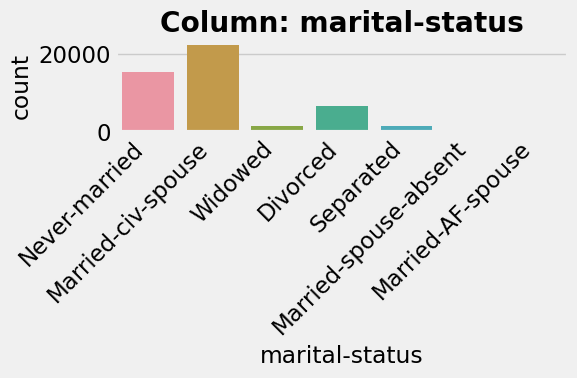

- NaN's Found: 0 (0.0%)
- Low cardinality; 7 unique values.
- Most common value: 'Married-civ-spouse' occurs 22364 times (46.4%)
- Not constant or quasi-constant.


In [63]:
viz_categorical(df, x='marital-status');

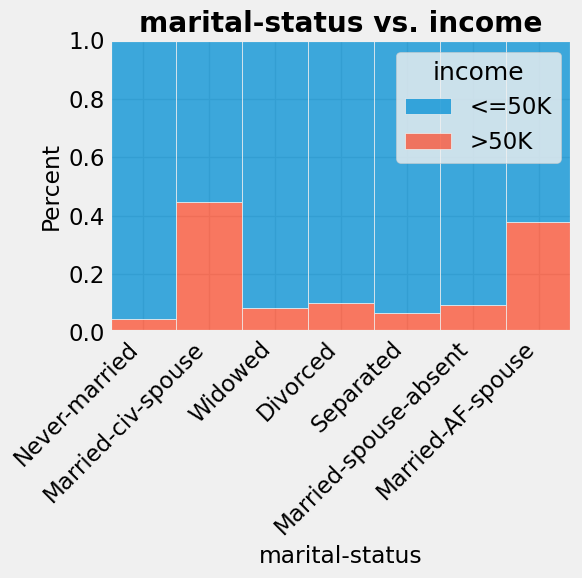

In [64]:
viz_categorical_vs_target(df, x='marital-status', y='income',
                          target_type='class', figsize=(6,6));

- There is almost an equal distribution of higher and lower reported incomes for people who are married where the spouse is not absent.
- All other marital statuses are highly correlated with lower income.

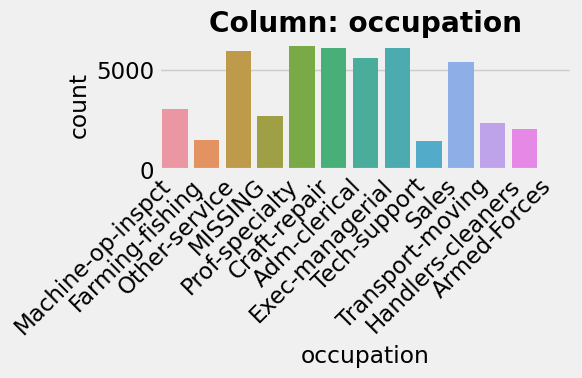

- NaN's Found: 2706 (5.61%)
Null values will be filled with the placeholder, 'MISSING'.

- High cardinality; 13 unique values.
- Most common value: 'Prof-specialty' occurs 6149 times (12.76%)
- Not constant or quasi-constant.


In [65]:
viz_categorical(df, x='occupation');

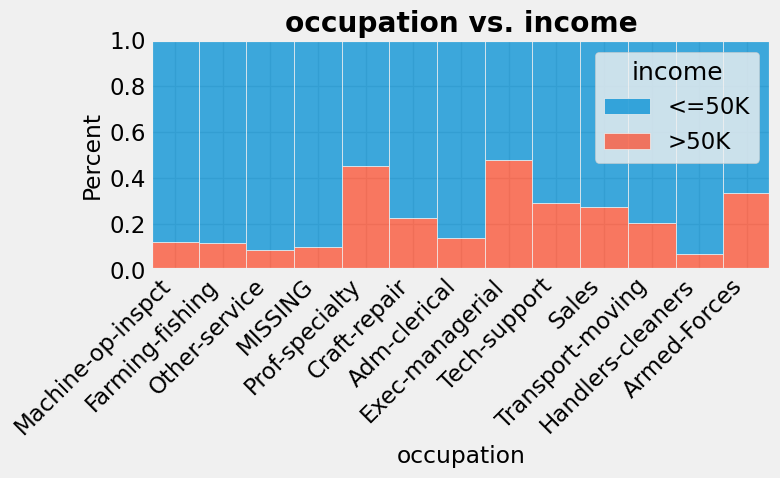

In [66]:
viz_categorical_vs_target(df, x='occupation', y='income', target_type='class',
                          figsize=(8,5));

- There is almost an equal distribution of higher and lower income reported for specialty professions and executive/managerial professions, as well as armed forces.
- All other occupation categories are highly correlated to lower income.

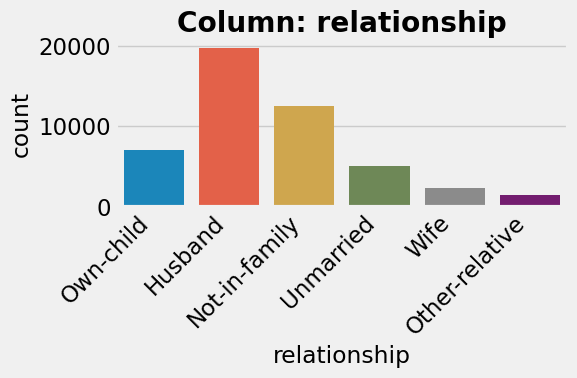

- NaN's Found: 0 (0.0%)
- Low cardinality; 6 unique values.
- Most common value: 'Husband' occurs 19702 times (40.88%)
- Not constant or quasi-constant.


In [67]:
viz_categorical(df, x='relationship');

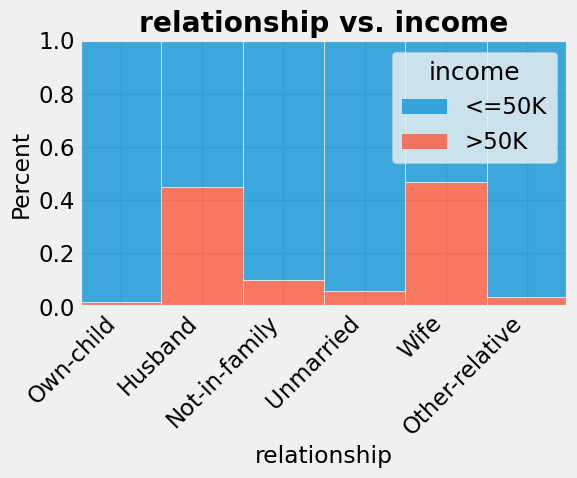

In [68]:
viz_categorical_vs_target(df, x='relationship', y='income', target_type='class',
                          figsize=(6,5));

Adults who claim spousal status are equally likely to earn higher or lower income. All other adult-types are most likely to report lower income.

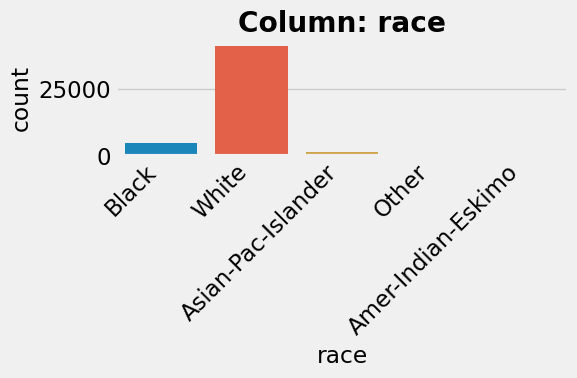

- NaN's Found: 0 (0.0%)
- Low cardinality; 5 unique values.
- Most common value: 'White' occurs 41181 times (85.44%)
- Not constant or quasi-constant.


In [69]:
viz_categorical(df, x='race');

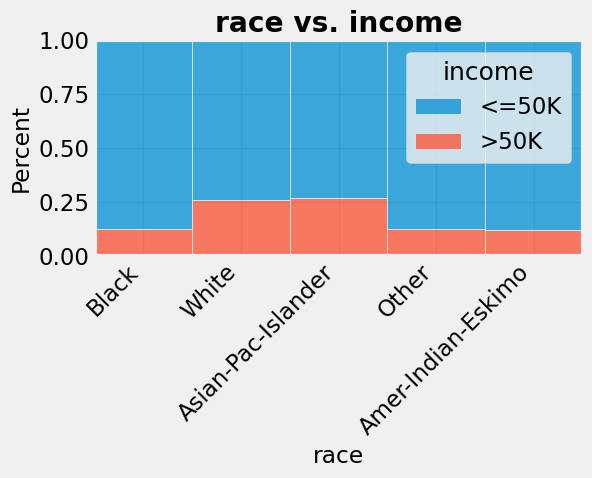

In [70]:
viz_categorical_vs_target(df, x='race', y='income', target_type='class',
                          figsize=(6,5));

Although white and Asian/Pacific Islander adults report higher income slighhly more than other races, there is still little to no correlation between race and income.

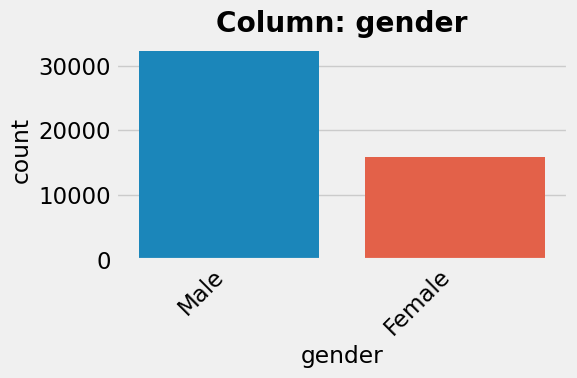

- NaN's Found: 0 (0.0%)
- Low cardinality; 2 unique values.
- Most common value: 'Male' occurs 32314 times (67.05%)
- Not constant or quasi-constant.


In [71]:
viz_categorical(df, x='gender');

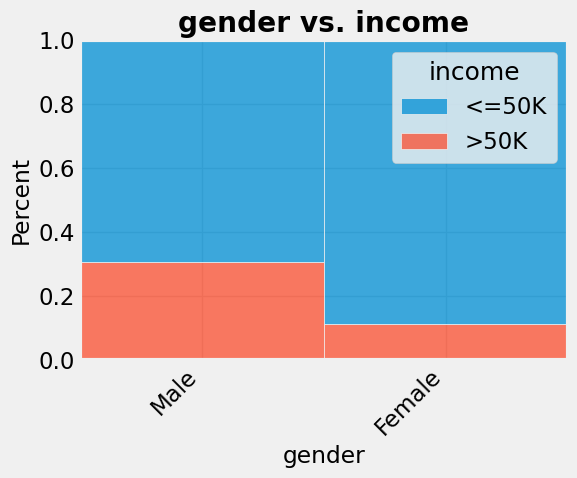

In [72]:
viz_categorical_vs_target(df, x='gender', y='income', target_type='class',
                          figsize=(6,5));

Males are slightly more likely to report higher income, but it is only moderate to little correlation.

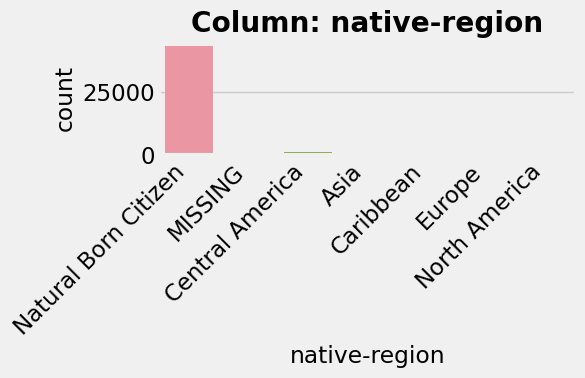

- NaN's Found: 968 (2.01%)
Null values will be filled with the placeholder, 'MISSING'.

- Low cardinality; 7 unique values.
- Most common value: 'Natural Born Citizen' occurs 43230 times (89.7%)
- Not constant or quasi-constant.


In [73]:
viz_categorical(df, x='native-region');

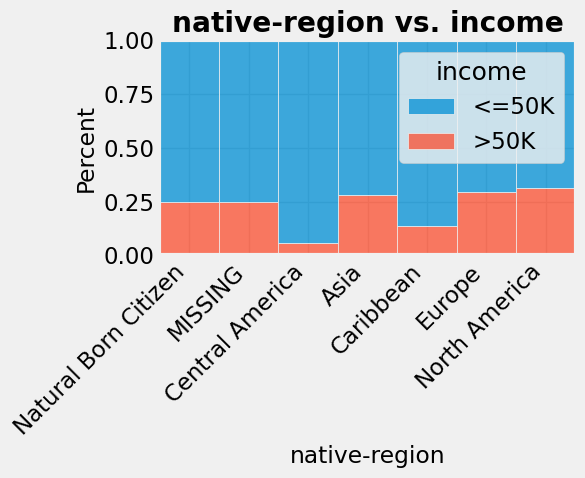

In [74]:
viz_categorical_vs_target(df, x='native-region', y='income',
                          target_type='class', figsize=(6,5));

Adults originally from Central America or the Caribbean are slightly more likely to report lower income.